In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch import nn
from IPython.display import Image

In [2]:
#uploaded = files.upload()

## Часть 1. Что такое нейронная сеть



$X = (x_1, x_2, \ldots, x_n)$ -- входные данные
    
$Y = (f(x_1), f(x_2), \ldots, f(x_n))$ -- ground truth, наблюдаемые ответы, где  f -- целевая зависимость, ее значения известны нам на множестве входных данных.
    
Мы хотим найти  аппроксимацию $f$, назовем ее $\hat{f}$ используя обучащие данные $X' \subset X$, такие что
    
 $ \hat{f}(X') \sim f(X') \text{ and } \hat{f}(X'') \sim f(X''),$
где $X'' = X\setminus X' $ - тестовые данные


Допустим, мы задали функцию $\hat{f}(x_i)$ (построили нейросеть). Как нам оценить, насколько наша функция близка к исходной?
Для этого мы зададим функцию потерь = $ \textbf{loss/ cost function}$ $\mathcal{L}(f, \hat{f}, x)$ .
Будем усреднять значение функции потерь для множества семплов (в общем случае для всего обучающего множества):
    $$\mathcal{C} = \frac{1}{t}\sum_{i = 1}^{t} \mathcal{L}(f, \hat{f}, x_i), x_i \in X'.$$

Примеры функции потерь:
* Кросс-энтропия (записана для случая бинарной классификации):
$$ \mathcal{L}(f,\hat{f}, x) = -(f(x)\cdot\log \hat{f}(x) + (1-f(x))\cdot\log(1-\hat{f}(x)));$$
* Квадратичное отклонение:
$$\mathcal{L}(f,\hat{f}, x) = (f(x) - \hat{f}(x))^2.$$

Мы интерпретируем выход нейронной сети, как вероятность.  Допустим, мы предсказываем род существительных на данных русского языка. Наши классы _средний, мужской, женский_ . Допустим:
$$f(x)  = [0.0, 1.0, 0.0], \hat{f}(x) = [0.1, 0.56, 0.34];$$
Тогда, используя кросс-энтропию(обобщенную на случай многоклассовой классификации), получаем значение ошибки:
$$\mathcal{L} = -(0.0\cdot\log(0.1)+1.0\cdot\log(0.56)+0.0\cdot\log(0.34)) \approx 0.252$$

После вычисления значения функции потерь $ \mathcal{L}(f,\hat{f)}$  мы оптимизируем параметры нашей сети $\hat{f}(x_i)$ . Для этого нам понадобится понятие __градиентного спуска__.  Градиент в математическом анализе  - это вектор, указывающий на направление максимального роста функции в заданной точке. Вектор-градиент состоит из частных производных функции от каждого из ее параметров. 
$ \mathcal{L}(f,\hat{f)}$ зависит от множества параметров  нейронной сети, каждый из возможных наборов значений параметров соответствует точке в пространстве параметров, принадлежащей функции потерь. Если, находясь в данной точке, мы знаем, в каком направлении надо двигаться, чтобы функция возрастала быстрее всего, то, двигаясь в противоположном направлении, мы добьемся минимализации ее значений.

Как может быть устроена функция $\hat{f}(x_i)$? Нейросеть удобно изображать в виде  графа. Посмотрим, чему соответствуют его вершины и ребра

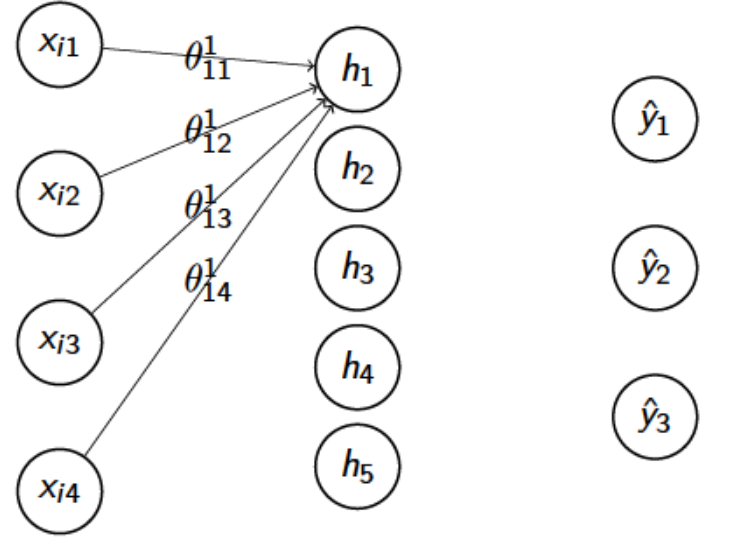

In [3]:
Image('img/1_neuron.png', width=350, height=220)

Вход в первый нейрон:
$z_1^1 = \theta^1_{11}\cdot x_{i1}+\theta^1_{12}\cdot x_{i2}+\theta^1_{13}\cdot x_{i3}+\theta^1_{14}\cdot x_{i4}+b^1_1.$

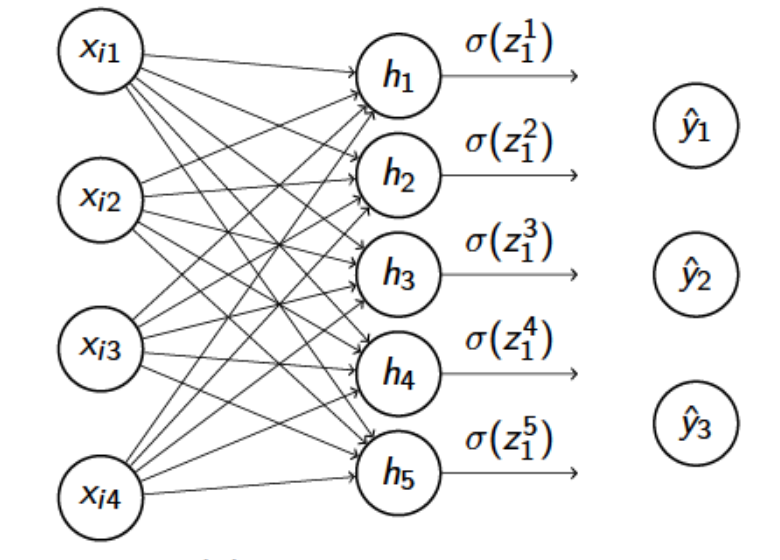

In [4]:
Image('img/sigmoid.png', width=350, height=220)

**Функции активации**

Сигмоида - одна из нелинейностей  (функций активации), применяющихся в нейронных сетях. Она принимает в себя выход с  одного из нейронов

$\sigma(x) = \frac{1}{1+e^{-x}}.$

In [5]:
act = nn.Sigmoid()
input = torch.randn(100000) 
print(input)
output = act(input)
print(output)

tensor([-1.3702,  0.6834, -0.4635,  ...,  1.2341, -0.3563,  0.7844])
tensor([0.2026, 0.6645, 0.3862,  ..., 0.7745, 0.4119, 0.6866])


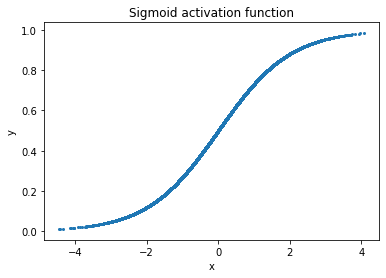

In [6]:
plt.scatter(input, output, s=4);
plt.title("Sigmoid activation function")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

следующая функция активации

ReLU (Rectified Linear Unit)


y = \begin{cases}
 x, &\text{ if } x > \text{0} \\
        \text{0}, &\text{ otherwise }
        \end{cases}

In [7]:
act = nn.ReLU()
input = torch.randn(100000)
print(input)
output = act(input)
print(output)

tensor([ 0.8732,  1.2783,  1.9137,  ..., -0.3944, -1.0543,  0.6029])
tensor([0.8732, 1.2783, 1.9137,  ..., 0.0000, 0.0000, 0.6029])


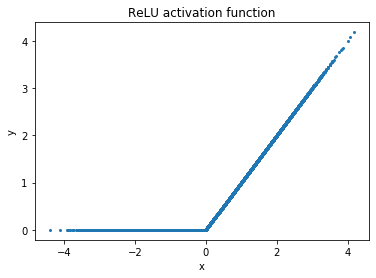

In [8]:
plt.scatter(input, output, s=4);
plt.title("ReLU activation function")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

еще одна функция, которую мы рассмотрим
tanh (hyperbolic tangent)

$ \tanh(x) = \frac{\exp(x) - \exp(-x)} {\exp(x) + \exp(-x)}$


In [9]:
act = nn.Tanh()
input = torch.randn(100000)
print(input)
output = act(input)
print(output)

tensor([-1.1684, -1.4076,  0.8925,  ...,  0.7566, -0.5241,  0.1786])
tensor([-0.8238, -0.8870,  0.7126,  ...,  0.6391, -0.4809,  0.1767])


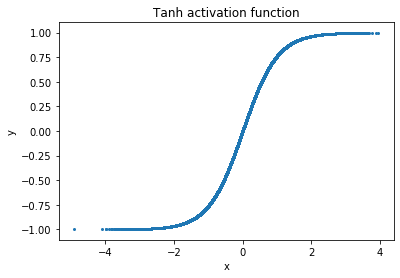

In [10]:
plt.scatter(input, output, s=4);
plt.title("Tanh activation function")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Если сигмоида позволяет нам интерпретировать выход сети как вероятность для бинарной классификации, то в случае с многоклассовой классификацией используемая функция активации **softmax**.

$\text{Softmax}(x_{i}) = \frac{\exp(x_i)}{\sum_j \exp(x_j)}$


In [11]:
act = nn.Softmax()
input = torch.randn(5)
print(input)
print(sum(input))
output = act(input)
print(output)
print(sum(output))

tensor([-0.0115,  0.4545,  0.9403, -0.5370, -1.8969])
tensor(-1.0506)


C:\Python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """


tensor([0.1687, 0.2689, 0.4370, 0.0998, 0.0256])
tensor(1.0000)


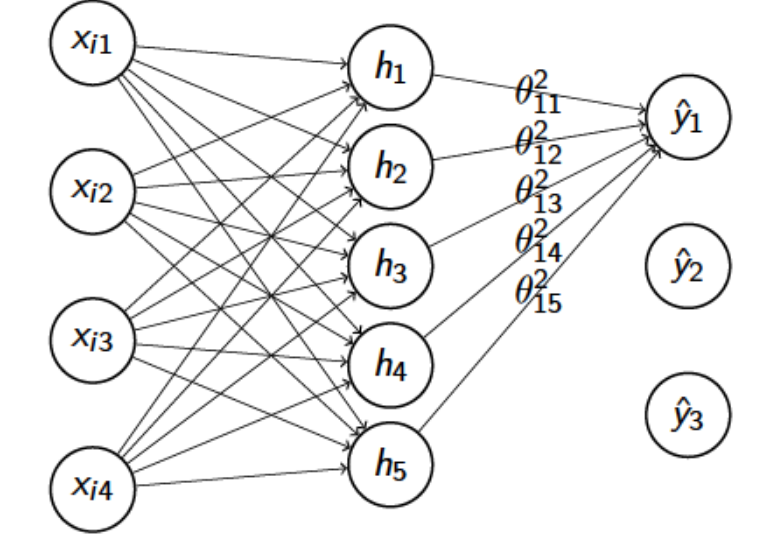

In [21]:
Image('img/2_layer.png', width=350, height=220)

$a_i = \sigma(z^1_i)$

Тогда вход в $\hat{y}_1$:

$z_1^2 = \theta^2_{11}\cdot a_1 + \theta^2_{12}\cdot a_2 + \theta^2_{13}\cdot a_3 + \theta^2_{14}\cdot a_4+ \theta^2_{15}\cdot a_5+b^2_1,$

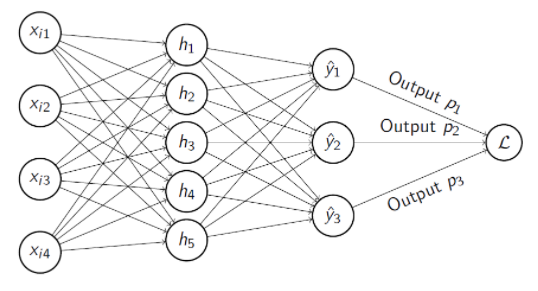

In [13]:
Image('img/full.png', width=400, height=220)

Более формально нейронную сеть можно представить в виде графа вычислений:

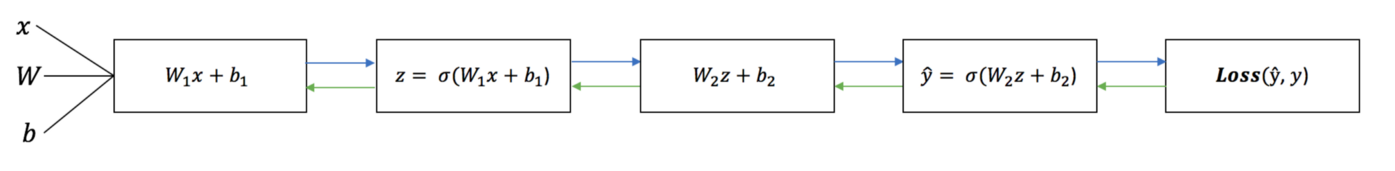

In [14]:
Image('img/forward_backward.png', width=850, height=100)

Процесс обучения выполняется циклом длиной в количество эпох:


*  Forward propagation: делаем шаг вперед, пропуская входные данные через нейроны сети.
*  Cчитаем значение функции ошибки (cost/loss function).
*  Back propagation: ищем градиент - направление максимального роста cost function при нынешних параметрах. 
*  Обновляем веса, перемещаясь по функции потерь в обратном градиенту направлении.



In [15]:
layer = nn.Linear(5,3)

In [16]:
layer.weight

Parameter containing:
tensor([[-0.2347,  0.2972,  0.1863,  0.3581, -0.1530],
        [ 0.2628,  0.4066,  0.1858,  0.3929, -0.1986],
        [ 0.3341,  0.0262, -0.3524,  0.3073, -0.2854]], requires_grad=True)

In [17]:
layer.bias

Parameter containing:
tensor([-0.4400, -0.2165,  0.0685], requires_grad=True)

In [18]:
act = nn.Sigmoid()

In [19]:
input = torch.randn(5)
print(input)

tensor([-0.5936,  0.6719,  0.7304,  0.9344,  0.5616])


In [20]:
print(input)
print(layer(input))
print(act(layer(input)))

tensor([-0.5936,  0.6719,  0.7304,  0.9344,  0.5616])
tensor([ 0.2837,  0.2919, -0.2428], grad_fn=<AddBackward0>)
tensor([0.5705, 0.5725, 0.4396], grad_fn=<SigmoidBackward>)
